## Hypothesis Testing - Project Description

Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased
with the introduction of a cut-resistant, longer-lasting golf ball.

1. Formulate and present the rationale for a hypothesis test that par could use to compare the driving distances of
the current and new golf balls.

2. Analyse the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your
recommendation for Par Inc.?

3. Provide descriptive statistical summaries of the data for each model.

#### Attribute information

    • Current: Current golf ball that is used.
    • New: New ball with better cut resistance.

#### 1. Import libraries

Import necessary libraries for the analysis

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind,levene,shapiro, iqr
from statsmodels.stats.power import ttest_power,TTestPower
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 2. Read File

In [3]:
df = pd.read_excel(r"C:\Users\divyakamat\data\DataSets\stats\SM4-Golf.xls")

#### 3. Sneak-peek at the data:
Let us look at the top few rows to view the data

In [4]:
df.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


In [6]:
#list the number of Numerical Features in our dataset.
numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns

['Current', 'New']

In [7]:
#let's find out the number of Categorical Features in our dataset.
categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
categorical_feature_columns

[]

- The data set contains 40 rows 
- There are two columns with discrete numeric data
- There are no categorical columns
- No missing values

#### 4. Statictical Summary
Let us look at the distribution of data in each of these columns using summary statictics

In [8]:
df.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


##### Descriptive Statistics for Current Golf Ball Model

In [9]:
print("The descriptive stats for Current Golf Ball Model")
print("----------------------------------------------")
print("The mean is %.3f." %  df["Current"].describe()["mean"])
print("The median is %.3f." %  df["Current"].describe()["50%"])
print("The standard deviation is %.3f." %  df["Current"].describe()["std"])
print("The variance is %.3f." %  df["Current"].describe()["std"] ** 2)
print("The iqr is %.3f." %  iqr(df["Current"]))

The descriptive stats for Current Golf Ball Model
----------------------------------------------
The mean is 270.275.
The median is 270.000.
The standard deviation is 8.753.
The variance is 76.615.
The iqr is 12.250.


##### Descriptive Statistics for New Golf Ball Model

In [10]:
print("The descriptive stats for New Golf Ball Model")
print("----------------------------------------------")
print("The mean is %.3f." %  df["New"].describe()["mean"])
print("The median is %.3f." %  df["New"].describe()["50%"])
print("The standard deviation is %.3f." %  df["New"].describe()["std"])
print("The variance is %.3f." %  df["New"].describe()["std"] ** 2)
print("The iqr is %.3f." %  iqr(df["New"]))

The descriptive stats for New Golf Ball Model
----------------------------------------------
The mean is 267.500.
The median is 265.000.
The standard deviation is 9.897.
The variance is 97.949.
The iqr is 12.500.


#### Inferences:
    - The mean and median for the New Golf Ball Model is lower than Current Model
    - The Std Deviation and Variation is high in New Golf Ball Model
    - The count is same for both the models

#### 5. Univariate Analysis
Let us look at the data distribution for both the variables using Seaborn

#### Histogram

C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


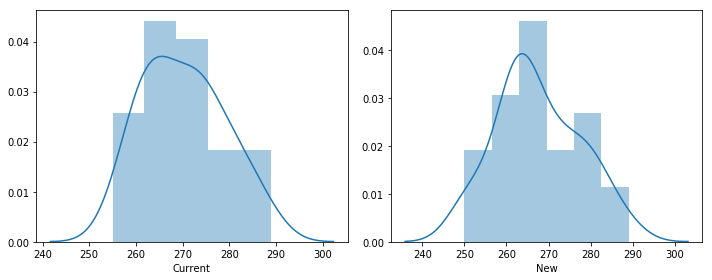

In [11]:
num_cols = ['Current','New']
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(df[num_cols[i]], hist=True, kde=True)
        plt.subplot(122)            
        sns.distplot(df[num_cols[i+1]], hist=True, kde=True)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(df[num_cols[i]], hist=True, kde=True)

Data for both current and new ball seems to be close to normal distribution

#### Box Plot

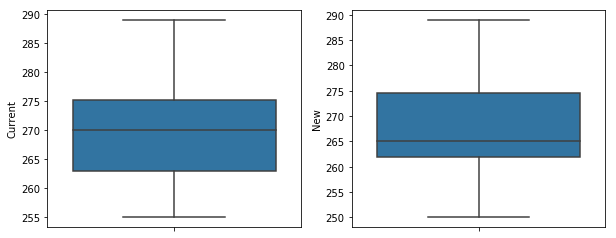

In [12]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.boxplot(x=df["Current"],orient='v')
plt.subplot(122)            
sns.boxplot(x=df["New"],orient='v')

- The overall distribution (spread) of data is same for both Current and New Golf ball Model variables.
- The median value for New is less than Current 
- There are no outliers in the dataset.

#### 6. Shapiro Test (Normality test)

Lets run a Shapiro test to test normality of the data i.e. to check if the data is normally distributed.

In [13]:
shapiro_current = shapiro(df["Current"])
print("The statictic is %.3f and the p-value is %.3f." % shapiro_current)


The statictic is 0.971 and the p-value is 0.379.


<b> Since p-value for Current Model is greater than chosen alpha level 0.05 (Level of Significance) we accept the null hypothesis and this implies that the data is normally distributed </b>

In [14]:
shapiro_new = shapiro(df["New"])
print("The statictic is %.3f and the p-value is %.3f." % shapiro_new)

The statictic is 0.968 and the p-value is 0.306.


<b> Since p-value for New Model is greater than chosen alpha level 0.05 (Level of Significance) we accept the null hypothesis and this implies that the data is normally distributed even for New Golf ball model </b>

#### 7. Formulate Hypothesis


From the given information, we can derive sample mean for driving distance of Current golf ball and sample mean for driving distance of New golf ball.

We will formulate the hypothesis to compare the means of these groups

- H0 (Null Hypothesis) : The means of these two groups are same 
- H1 (Alternative) : The mean of New golf ball and the current golf ball is not same


#### 8. Levene's test
Levene's test is an inferential statistic used to assess the equality of variances or two or more groups. 

    - H0 (Null Hypothesis) : The variance of these two groups are same 
    - H1 (Alternative) : The variance of New golf ball and the current golf ball is not same


In [15]:
levene1=levene(df["Current"],df["New"])
print("The statistic is %.3f and the p-value is %.3f." % levene1)


The statistic is 0.255 and the p-value is 0.615.


#### Conclusion:
As p_value > 0.05 (level of significance) so we accept null hypothesis, implying that variance of driving distances of the current and new golf balls are equal

#### 9. Choose statistical test

Although the size (n) for both Current and New ball is 40, we will use two sample t-statistic for our hypothesis testing

In [16]:
two_sample = ttest_ind(df["Current"], df["New"])
print('\nThe results of the independent t-test are: \n\tt-value = {:4.3f}\n\tp-value = {:4.3f}'.format(two_sample[0],two_sample[1]))



The results of the independent t-test are: 
	t-value = 1.328
	p-value = 0.188


#### Conclusion:

As p_value > 0.05 (level of significance) so we accept null hypothesis, to conclude that sample means of driving distances of the current and new golf balls are equal

In [17]:
# Calculate the mean difference and 95% confidence interval
N1 = N2 = 40

#Calculate and Initialize - standard deviation, mean and sample size to be passed to the functions
s1 = np.std(df["Current"])
s2 = np.std(df["New"])

x1 = np.mean(df["Current"])
x2 = np.mean(df["New"])

diff_mean = x1 - x2

### Degree of Freedom Calculation

In [18]:
# Function to calculate degree of freedom
def degree_of_freedom (std_dev1,std_dev2,sample_size1,sample_size2):
    numerator = (((std_dev1 ** 2)/sample_size1) + ((std_dev2 ** 2)/sample_size2)) ** 2
    denominator = (((std_dev1 ** 2/sample_size1) ** 2) * (1/(sample_size1-1))) + (((std_dev2 ** 2/sample_size2) ** 2) * (1/(sample_size2-1)))
    dof = numerator/denominator
    return dof

### Standard Error and Margin of Error Calculation for Equal Variance

In [26]:
Standard_Error = np.sqrt( np.var(df["Current"])/N1 +  np.var(df["New"])/N2) 
MoE = stats.t.ppf(0.97, N1+N2-2) *  Standard_Error

### Calculating the mean [95% confidence interval] difference between two groups / models

In [24]:
#Confidence Interval for Current Golf Ball Model
ci_internal = stats.t.interval(0.95, N1-1, loc = df["Current"].mean(), scale=stats.sem(df["Current"]) )
print ('\nThe Confidence Interval for Current Model {:3.2f} [{:3.2f} to {:3.2f}] (mean [95% CI]) '.format(df["Current"].mean() , ci_internal[0], ci_internal[1]))

#Confidence Interval for New Golf Ball Model
# stats.norm.interval(0.95, loc =df["New"].mean() ) - This is for CI using Z stats
ci_new_inv = stats.t.interval(0.95, N2-1, loc = df["New"].mean(), scale=stats.sem(df["New"]))
print ('The Confidence Interval for New Model {:3.2f} [{:3.2f} to {:3.2f}] (mean [95% CI]) '.format(df["New"].mean() , ci_new_inv[0], ci_new_inv[1]))

print('\nThe results of the independent t-test are: \n\tt-value = {:4.3f}\n\tp-value = {:4.3f}'.format(two_sample[0],two_sample[1]))
print ('\nThe difference between groups is {:3.2f} [{:3.2f} to {:3.2f}] (mean [95% CI]) '.format(diff_mean, diff_mean - MoE, diff_mean + MoE))



The Confidence Interval for Current Model 270.27 [267.48 to 273.07] (mean [95% CI]) 
The Confidence Interval for New Model 267.50 [264.33 to 270.67] (mean [95% CI]) 

The results of the independent t-test are: 
	t-value = 1.328
	p-value = 0.188

The difference between groups is 2.77 [-1.16 to 6.71] (mean [95% CI]) 


### Power of Test

In [27]:
cohens_d = (x1 - x2) / np.sqrt(((N1-1) * np.var(df["Current"]) + (N2-1) * np.var(df["New"]))/N1+N2) 
print('\npower of test is {:3.2f}'.format(ttest_power(cohens_d,nobs=40,alpha = 0.05,alternative="two-sided")))


power of test is 0.45


In [22]:
N = 10000
cohens_d = (x1 - x2) / np.sqrt(((N-1) * np.var(df["Current"]) + (N-1) * np.var(df["New"]))/N+N) 
print('\npower of test is {:3.2f}'.format(ttest_power(cohens_d,nobs=N,alpha = 0.05,alternative="two-sided")))


power of test is 0.79


## Summary

The output, provides us with the t-value (t) and the p-value. Because the p-value is greater than the threshold of 0.05 (alpha), we accept the null hypothesis and can report that there is a no statistically significant difference in the mean's of two Golf Ball Models.

The output also provides, 95% confidence interval for the difference between groups as well as the mean driving distance of each group. 
Based on these values, we can conclude that the mean [95% CI] difference between groups is 2.77 [-1.16 to 6.71]. 

An alternative interpretation is that we can be 95% certain that the (true) difference in means between Current Golf Model and New Golf Model falls between -1.16 to 6.71.

So there will not be a significant difference by introducing the new golf ball model.
As we are not in a position to reject the Null Hypothesis, if we accept the null hypothesis, we also need to control the probability of type 2 error and calculate the power of the hypothesis test.
Power of test is only around 22%, so we need to control the sample size to increase the power of test. We will have to run this test with higher sample data to arrive at any further decision.

### End of Notebook